In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import MaxPooling2D,Dropout,Flatten,Dense,Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 2,
                                                 class_mode = 'binary')

Found 30 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 2,
                                            class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [10]:
training_set

In [13]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
r = classifier.fit_generator(training_set,
                         epochs = 50,
                         validation_data = test_set,
                         )

W0412 00:08:46.703330 76764 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0412 00:08:46.778091 76764 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 15 steps, validate for 10 steps
Epoch 1/50
15/15 [==============================] - 2s 140ms/step - loss: 0.0667 - accuracy: 0.9667 - val_loss: 1.0329 - val_accuracy: 0.7500
Epoch 2/50
15/15 [==============================] - 3s 176ms/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 0.4472 - val_accuracy: 0.9500
Epoch 3/50
15/15 [==============================] - 3s 182ms/step - loss: 0.0806 - accuracy: 0.9667 - val_loss: 0.2104 - val_accuracy: 0.9500
Epoch 4/50
15/15 [==============================] - 3s 173ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.4199 - val_accuracy: 0.9500
Epoch 5/50
15/15 [==============================] - 2s 165ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.5266 - val_accuracy: 0.9500
Epoch 6/50
15/15 [==============================] - 2s 166ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.3718 - val_accuracy: 0.9500
Epoch 7/50
15/15 [==============================] - 3s 177ms/step - loss: 0.0145 - accuracy: 1.0000 - val_

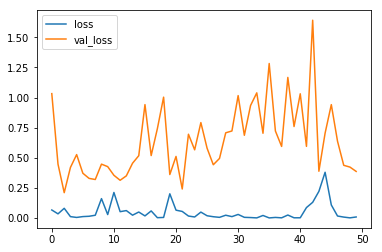

In [20]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

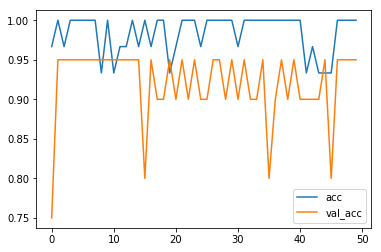

In [21]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()